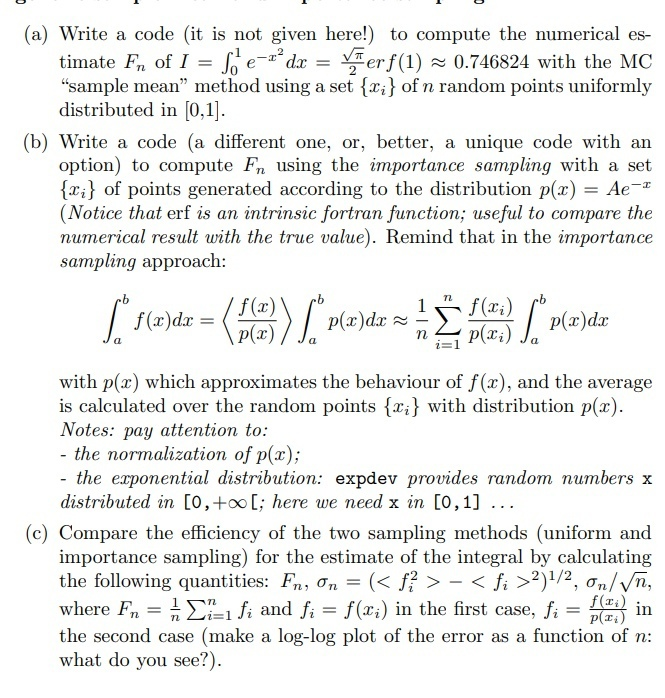

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

(0.7512814140414561, 0.21068609925444562)
(0.7475733415386995, 0.20241965616133217)
0.7523624227013499
0.7457377796840123


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


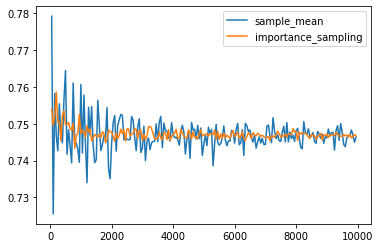

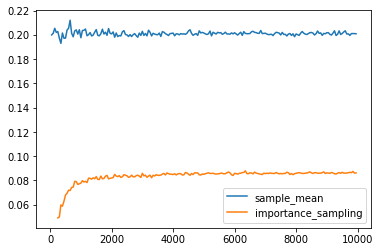

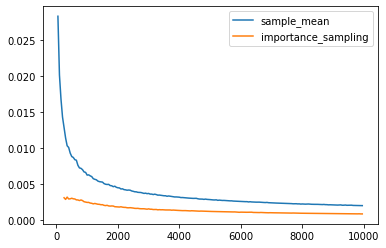

In [ ]:
#на А сократили сраза в формуле
def f(x):
  return(np.exp(-x**2))

def p(x):
  return np.exp(-x)

def sample_mean(func, size):
  x = np.random.uniform(0, 1, size)
  sum = 0
  squares = 0
  for i in x:
    sum += func(i)
    squares += (func(i))**2
  sum /= size
  var = squares / size - sum**2
  var = (var)**0.5
  return sum, var

print(sample_mean(f, 100))
print(sample_mean(f, 1000))

def imp_sampling(f, size):
  x = scipy.stats.expon.rvs(size = 10*size)
  sum = 0
  count = 0
  squares = 0
  for i in x:
      if i <= 1:
        sum += (f(i)/p(i))
        squares += (f(i)/p(i))**2 
        count += 1
      if count > size:
        break
  sum /= size
  var = squares/size - sum**2
  var = (var)**0.5
  sum *= (1 - 1/np.exp(1))
  return sum, var

print(imp_sampling(f, 100)[0])
print(imp_sampling(f, 10000)[0])

F_sample_mean = []
F_imp_sampl = []
var_sample_mean = []
var_imp_sampling = []
var_sample_mean_div = []
var_imp_sampling_div = []
n = list(range(50, 10000, 50))
for size in n:
  tmp = sample_mean(f, size)
  F_sample_mean.append(tmp[0])
  var_sample_mean.append(tmp[1])
  var_sample_mean_div.append(tmp[1]/(size)**0.5)
  tmp =imp_sampling(f, size)
  F_imp_sampl.append(tmp[0])
  var_imp_sampling.append(tmp[1])
  var_imp_sampling_div.append(tmp[1]/(size)**0.5)

plt.plot(n, F_sample_mean, label = 'sample_mean')
plt.plot(n, F_imp_sampl, label = 'importance_sampling')
plt.legend()
plt.show()

plt.plot(n, var_sample_mean, label = 'sample_mean')
plt.plot(n, var_imp_sampling, label = 'importance_sampling')
plt.legend()
plt.show()

plt.plot(n, var_sample_mean_div, label = 'sample_mean')
plt.plot(n, var_imp_sampling_div, label = 'importance_sampling')
plt.legend()
plt.show()

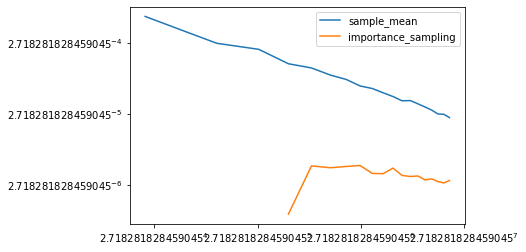

In [ ]:

plt.loglog(n, var_sample_mean_div, basex=np.e, basey=np.e, label = 'sample_mean')
plt.loglog(n, var_imp_sampling_div, basex=np.e, basey=np.e, label = 'importance_sampling')
plt.legend()
plt.show()